In [1]:
pip install ultralytics > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print(os.path.exists('/kaggle/input/input-video-1x/input_video.mp4'))


True


In [3]:
from ultralytics import YOLO 

# model = YOLO('yolov8x')

# result = model.track('/kaggle/input/input-video-1x/input_video.mp4',conf=0.2, save=True,verbose=False)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# from ultralytics import YOLO 

# model1 = YOLO('yolov8x')

# result = model1.track('/kaggle/input/input-video-1x/input-video_CAf3w5J1.mp4',conf=0.2, save=True,verbose=False)

In [5]:
# from ultralytics import YOLO 

# model2 = YOLO('yolov8x')

# result = model2.track('/kaggle/input/input-video-1x/input-video_jZGZVQAw.mp4',conf=0.2, save=True,verbose=False)

In [6]:
video_paths = [
    '/kaggle/input/different-speed-of-tennis-data-set/0.25_x_input_video.mp4',  # 0.25x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/0.50_x_input_video.mp4',     # 0.5x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/1_x_input_video.mp4', #1x speed Video
    '/kaggle/input/different-speed-of-tennis-data-set/1.5_x_input_video.mp4', #1.5x Speed Video
    '/kaggle/input/different-speed-of-tennis-data-set/2_x_input_video.mp4',      # 2x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/4_x_input_video.mp4'    # 4x speed Video
]    
for video in video_paths:
    model = YOLO('yolov8x')

    result = model.track(video,conf=0.2, save=True,verbose=False)

100%|██████████| 131M/131M [00:00<00:00, 424MB/s]


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to runs/detect/track

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing pote

In [7]:
import cv2
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8x')

# Function to process video and count 'sports ball' detections
def count_sports_ball_detections(video_paths, conf=0.2):
    ball_detection_counts = {}

    # Iterate over each video path
    for video_path in video_paths:
        cap = cv2.VideoCapture(video_path)
        ball_count = 0  # Counter for sports ball detections
        
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Detect objects in the frame using YOLO
            results = model(frame, conf=conf,verbose=False) # verbose used to dont print results 
            
            # Iterate over detected objects and count sports balls
            for result in results:
                for obj in result.boxes:
                    # Check if the label is 'sports ball'
                    if 'sports ball' in result.names[int(obj.cls)]:
                        ball_count += 1
        
        # Store the count for this video
        video_name = video_path.split('/')[-1]  # Extract video file name
        ball_detection_counts[video_name] = ball_count
        
        # Release the video capture for this file
        cap.release()
    
    return ball_detection_counts





# List of video paths and speed factors
video_paths = [
    '/kaggle/input/different-speed-of-tennis-data-set/0.25_x_input_video.mp4',  # 0.25x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/0.50_x_input_video.mp4',     # 0.5x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/1_x_input_video.mp4', #1x speed Video
    '/kaggle/input/different-speed-of-tennis-data-set/1.5_x_input_video.mp4', #1.5x Speed Video
    '/kaggle/input/different-speed-of-tennis-data-set/2_x_input_video.mp4',      # 2x speed video
    '/kaggle/input/different-speed-of-tennis-data-set/4_x_input_video.mp4'    # 4x speed Video
]    

# Count 'sports ball' detections in each video
ball_counts = count_sports_ball_detections(video_paths)

# Output the detection counts
print("Sports ball detection counts by video format:")
for video, count in ball_counts.items():
    print(f"{video}: {count} detections")


Sports ball detection counts by video format:
0.25_x_input_video.mp4: 111 detections
0.50_x_input_video.mp4: 57 detections
1_x_input_video.mp4: 35 detections
1.5_x_input_video.mp4: 17 detections
2_x_input_video.mp4: 18 detections
4_x_input_video.mp4: 4 detections


In [8]:


# Output the detection counts
print("Sports ball detection counts by video format:")
for video, count in ball_counts.items():
    print(f"{video}: {count} detections")

Sports ball detection counts by video format:
0.25_x_input_video.mp4: 111 detections
0.50_x_input_video.mp4: 57 detections
1_x_input_video.mp4: 35 detections
1.5_x_input_video.mp4: 17 detections
2_x_input_video.mp4: 18 detections
4_x_input_video.mp4: 4 detections


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Detection counts data
ball_counts = {
    "0.25_x_input_video.mp4": 111,
    "0.50_x_input_video.mp4": 57,
    "1_x_input_video.mp4": 35,
    "1.5_x_input_video.mp4": 17,
    "2_x_input_video.mp4": 18,
    "4_x_input_video.mp4": 4
}

# Convert data to DataFrame for pretty table
df = pd.DataFrame(list(ball_counts.items()), columns=['Video Format', 'Sports Ball Detections'])

# Pretty Table using tabulate
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print("Sports Ball Detection Counts by Video Format:")
print(table)


Sports Ball Detection Counts by Video Format:
╒════════════════════════╤══════════════════════════╕
│ Video Format           │   Sports Ball Detections │
╞════════════════════════╪══════════════════════════╡
│ 0.25_x_input_video.mp4 │                      111 │
├────────────────────────┼──────────────────────────┤
│ 0.50_x_input_video.mp4 │                       57 │
├────────────────────────┼──────────────────────────┤
│ 1_x_input_video.mp4    │                       35 │
├────────────────────────┼──────────────────────────┤
│ 1.5_x_input_video.mp4  │                       17 │
├────────────────────────┼──────────────────────────┤
│ 2_x_input_video.mp4    │                       18 │
├────────────────────────┼──────────────────────────┤
│ 4_x_input_video.mp4    │                        4 │
╘════════════════════════╧══════════════════════════╛


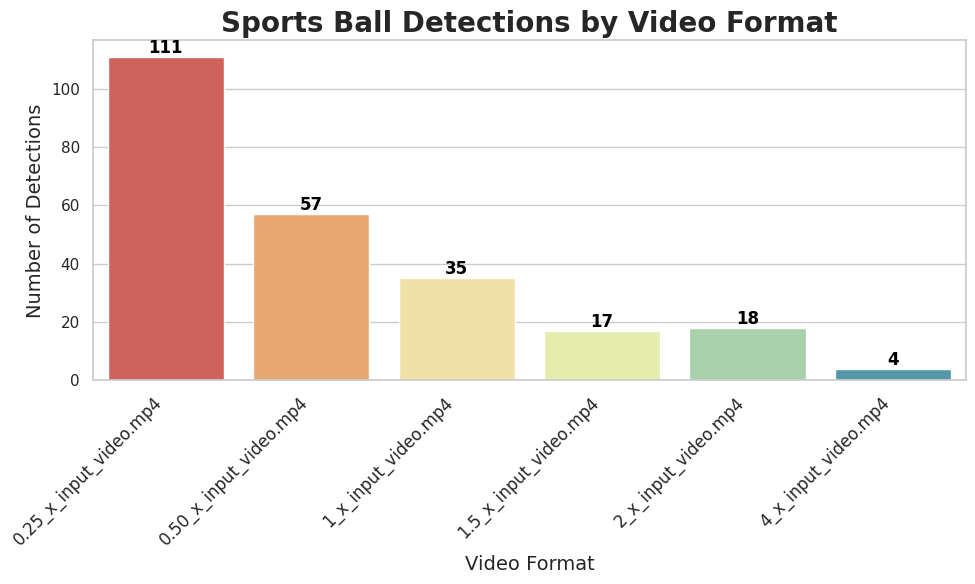

In [10]:

# Plot to Visualise the result 
sns.set(style="whitegrid")  # Clean white grid background
plt.figure(figsize=(10, 6))

# Create a more vibrant bar plot
colors = sns.color_palette("Spectral", len(df))  # Use a vibrant color palette
ax = sns.barplot(x='Video Format', y='Sports Ball Detections', data=df, palette=colors)

# Add titles and labels
plt.title('Sports Ball Detections by Video Format', fontsize=20, fontweight='bold')
plt.xlabel('Video Format', fontsize=14)
plt.ylabel('Number of Detections', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Show plot with tighter layout
plt.tight_layout()
plt.show()


In [11]:
model = YOLO('yolov8x')

result = model.track('/kaggle/input/input-video-1x/Federer vs Nadal .mp4',conf=0.2, save=True,verbose=False)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to runs/detect/track7


In [12]:
# Load YOLOv8 model
model = YOLO('yolov8x')

# Function to process video and count 'sports ball' detections
def count_sports_ball_detections(video_paths, conf=0.2):
    ball_detection_counts = {}

    # Iterate over each video path
    for video_path in video_paths:
        cap = cv2.VideoCapture(video_path)
        ball_count = 0  # Counter for sports ball detections
        
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Detect objects in the frame using YOLO
            results = model(frame, conf=conf,verbose=False)
            
            # Iterate over detected objects and count sports balls
            for result in results:
                for obj in result.boxes:
                    # Check if the label is 'sports ball'
                    if 'sports ball' in result.names[int(obj.cls)]:
                        ball_count += 1
        
        # Store the count for this video
        video_name = video_path.split('/')[-1]  # Extract video file name
        ball_detection_counts[video_name] = ball_count
        
        # Release the video capture for this file
        cap.release()
    
    return ball_detection_counts





# List of video paths and speed factors
video_paths = ['/kaggle/input/input-video-1x/Federer vs Nadal .mp4',
#                '/kaggle/input/different-speed-of-tennis-data-set/4_x_input_video.mp4'
   
]

# Count 'sports ball' detections in each video
ball_counts = count_sports_ball_detections(video_paths)

# Output the detection counts
print("Sports ball detection counts by video format:")
for video, count in ball_counts.items():
    print(f"{video}: {count} detections")

Sports ball detection counts by video format:
Federer vs Nadal .mp4: 797 detections
